In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
train = pd.read_csv("../data/train.csv")
test  = pd.read_csv("../data/test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../train.csv'

In [155]:
train.shape, test.shape

((4209, 378), (4209, 377))

In [156]:
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [157]:
test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [158]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

## Solution2: Check for null and unique values for test and train sets.

In [159]:
train_NaN = pd.DataFrame(data = train.isnull().sum(), columns = ['Count_of_NaN'] )
print(train_NaN)
train_NaN['% NaN'] =  (train_NaN['Count_of_NaN']/train.shape[0])*100
train_NaN[train_NaN.sum(axis =1)>0]

      Count_of_NaN
ID               0
y                0
X0               0
X1               0
X2               0
...            ...
X380             0
X382             0
X383             0
X384             0
X385             0

[378 rows x 1 columns]


,Count_of_NaN,% NaN


In [160]:
train_NaN[train_NaN.sum(axis =1)>0]

,Count_of_NaN,% NaN


In [161]:
test_NaN = pd.DataFrame(data = test.isnull().sum(), columns = ['Count_of_NaN'] )
print(test_NaN)
test_NaN['% NaN'] =  (test_NaN['Count_of_NaN']/test.shape[0])*100
test_NaN[test_NaN.sum(axis =1)>0]

      Count_of_NaN
ID               0
X0               0
X1               0
X2               0
X3               0
...            ...
X380             0
X382             0
X383             0
X384             0
X385             0

[377 rows x 1 columns]


,Count_of_NaN,% NaN


In [162]:
test_NaN[test_NaN.sum(axis =1)>0]

,Count_of_NaN,% NaN


In [163]:
import pandas as pd
stats=pd.DataFrame()
stats["Var"]=train.var()

stats


,Var
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02
...,...
X380,8.014579e-03
X382,7.546747e-03
X383,1.660732e-03
X384,4.750593e-04


## Zero Variance columns

In [164]:
stats[stats.Var == 0]

,Var
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


#  Solution1: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [165]:
train.drop(['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'], axis=1)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


## solution3: Apply label encoder for categorial variables 

In [166]:
obj_cols = train.select_dtypes(include=['object']).columns
df_obj = train[obj_cols]


In [167]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
 7   X8      4209 non-null   object
dtypes: object(8)
memory usage: 263.2+ KB


In [168]:
df_obj.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [169]:
df_obj['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [170]:
len(df_obj['X1'].unique())

27

In [171]:
len(df_obj['X0'].unique())

47

In [172]:
df_obj.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [173]:
for i in df_obj.columns:
    print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [174]:
## 

## Convert catagorial to label encoding 

In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_obj_l = df_obj[['X0', 'X1','X2', 'X3','X4', 'X5','X6','X8']].apply(le.fit_transform)
df_obj_l

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


## concatenate categorial encoded coloumns and num coloumns

In [176]:
num = train.select_dtypes(exclude=['object']).columns
num = train[num]
df_num = pd.concat([df_obj_l, num], axis=1)
df_num

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,130.81,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,6,88.53,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,7,76.26,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,9,80.62,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,13,78.02,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,8405,107.39,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,8406,108.77,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,8412,109.22,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,8415,87.48,...,0,0,0,0,0,0,0,0,0,0


## Drop the y variable

In [177]:
df_num.drop(['y'], axis=1)


,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,6,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,7,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,9,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,8405,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,8406,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,8412,0,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,8415,0,...,0,0,0,0,0,0,0,0,0,0


## Solution 4: Perform dimensionality reduction

In [178]:
from sklearn.decomposition import PCA
pca = PCA(n_components =5)
pca.fit(df_num)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [179]:
pca.explained_variance_ratio_

array([9.99888440e-01, 3.74189360e-05, 2.41438603e-05, 1.91217796e-05,
       1.08079967e-05])

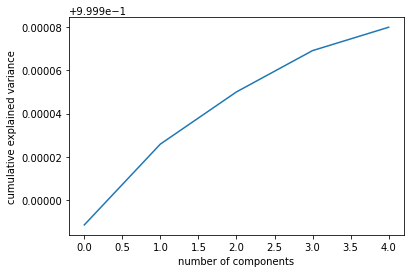

In [180]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [181]:
x = PCA(n_components = 0.999999)
x.fit(df_num)
x_pca = x.transform(df_num)

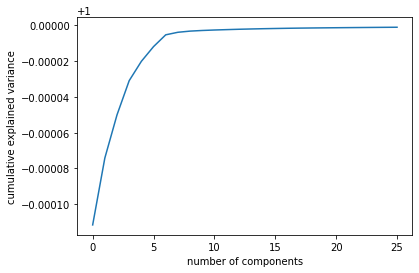

In [182]:
plt.plot(np.cumsum(x.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

*****************1st PASS **************************

In [183]:
y=df_num[['y']]
y

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02
...,...
4204,107.39
4205,108.77
4206,109.22
4207,87.48


In [184]:
df_num.drop(['y'], axis=1)


,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,6,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,7,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,9,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,8405,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,8406,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,8412,0,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,8415,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
X=df_num
df_num

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,130.81,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,6,88.53,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,7,76.26,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,9,80.62,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,13,78.02,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,8405,107.39,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,8406,108.77,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,8412,109.22,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,8415,87.48,...,0,0,0,0,0,0,0,0,0,0


In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state = 110)

In [187]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


In [188]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [189]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1205,44,3,33,2,3,1,9,9,2403,150.89,...,0,0,1,0,0,0,0,0,0,0
862,7,13,16,5,3,5,6,9,1715,98.93,...,0,0,0,0,0,0,0,0,0,0
2060,9,19,3,2,3,16,6,6,4127,95.67,...,1,0,0,0,0,0,0,0,0,0
3464,26,13,16,5,3,22,11,19,6914,93.81,...,0,0,0,0,0,0,0,0,0,0
943,36,13,16,5,3,6,6,0,1878,101.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,40,3,33,2,3,20,9,5,5902,99.26,...,0,0,1,0,0,0,0,0,0,0
1295,20,13,16,2,3,2,8,3,2551,76.64,...,0,0,0,0,0,0,1,0,0,0
2109,7,9,16,5,3,16,6,21,4227,100.04,...,0,0,0,0,0,0,0,0,0,0
1763,12,21,9,1,3,4,3,24,3523,120.17,...,1,0,0,0,0,0,0,0,0,0


In [190]:
y_train

,y
1205,150.89
862,98.93
2060,95.67
3464,93.81
943,101.20
...,...
2944,99.26
1295,76.64
2109,100.04
1763,120.17


In [191]:
y_train_pred = xgb.predict(X_train)


In [192]:

y_test_pred = xgb.predict(X_test)


In [193]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0013046498804318402
Root_Mean_Squared_Error : 0.03611993743670994
r_square_value : 0.9999918696346887


In [194]:

mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.0639173333277618
Root_Mean_Squared_Error : 0.25281877566304645
r_square_value : 0.9996038346699375


*****************2nd PASS **************************

In [195]:
print(X)
print(y)

      X0  X1  X2  X3  X4  X5  X6  X8    ID       y  ...  X375  X376  X377  \
0     32  23  17   0   3  24   9  14     0  130.81  ...     0     0     1   
1     32  21  19   4   3  28  11  14     6   88.53  ...     1     0     0   
2     20  24  34   2   3  27   9  23     7   76.26  ...     0     0     0   
3     20  21  34   5   3  27  11   4     9   80.62  ...     0     0     0   
4     20  23  34   5   3  12   3  13    13   78.02  ...     0     0     0   
...   ..  ..  ..  ..  ..  ..  ..  ..   ...     ...  ...   ...   ...   ...   
4204   8  20  16   2   3   0   3  16  8405  107.39  ...     1     0     0   
4205  31  16  40   3   3   0   7   7  8406  108.77  ...     0     1     0   
4206   8  23  38   0   3   0   6   4  8412  109.22  ...     0     0     1   
4207   9  19  25   5   3   0  11  20  8415   87.48  ...     0     0     0   
4208  46  19   3   2   3   0   6  22  8417  110.85  ...     1     0     0   

      X378  X379  X380  X382  X383  X384  X385  
0        0     0     0    

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,  random_state = 110)
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
#Train prediction      
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)



Mean_Squared_Error : 0.0011562043093238134
Root_Mean_Squared_Error : 0.03400300441613672
r_square_value : 0.9999927953950905


In [197]:
#Test prediction
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.31362022758956676
Root_Mean_Squared_Error : 0.5600180600566081
r_square_value : 0.998239536633787


In [198]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [199]:
obj_cols_test = test.select_dtypes(include=['object']).columns
df_obj_test = test[obj_cols_test]
df_obj_test

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_obj_l_test = df_obj_test[['X0', 'X1','X2', 'X3','X4', 'X5','X6','X8']].apply(le.fit_transform)
df_obj_l_test

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [201]:
num = test.select_dtypes(exclude=['object']).columns
num = test[num]
df_num_test = pd.concat([df_obj_l_test, num], axis=1)
df_num_test

,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,1,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,2,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,3,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,4,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,5,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,8410,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,8411,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,8413,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,8414,0,...,0,0,1,0,0,0,0,0,0,0


In [202]:
import pandas as pd
stats=pd.DataFrame()
stats["Var"]=df_num_test.var()

stats

,Var
X0,231.684235
X1,73.008823
X2,104.598050
X3,3.157646
X4,0.006171
...,...
X380,0.008015
X382,0.008715
X383,0.000475
X384,0.000712


In [203]:
stats[stats.Var == 0]

,Var
X257,0.0
X258,0.0
X295,0.0
X296,0.0
X369,0.0


In [216]:
df_num_test.drop(['X257','X258','X295','X296','X369'], axis=1)


,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,1,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,2,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,3,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,4,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,5,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,8410,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,8411,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,8413,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,8414,0,...,0,0,1,0,0,0,0,0,0,0


In [217]:
df_num_test

,X0,X1,X2,X3,X4,X5,X6,X8,ID,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,1,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,2,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,3,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,4,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,5,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,8410,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,8411,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,8413,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,8414,0,...,0,0,1,0,0,0,0,0,0,0


In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state = 110)
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
#Train prediction      
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0013084171541489105
Root_Mean_Squared_Error : 0.03617204934958635
r_square_value : 0.9999918679188617


In [224]:
#Test prediction
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.12834768757107667
Root_Mean_Squared_Error : 0.3582564550305782
r_square_value : 0.9991921523142183
